# Molt-4 and CCRF-CEM Sampling Analysis


In [1]:
import cobra
from cobrapy_bigg_client import client
import numpy as np
import pandas as pd
from cobra.sampling import sample
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

## Load models

In [2]:
molt4_CCRF_dict = np.load('molt4_CCRF_dict.npy',allow_pickle='TRUE').item()

In [3]:
molt4 = molt4_CCRF_dict['Molt4']
CCRF = molt4_CCRF_dict['CCRF']

In [4]:
molt4_CCRF_dict 

{'Molt4':       10FTHF5GLUtl  10FTHF5GLUtm  10FTHF6GLUtl  10FTHF6GLUtm  10FTHF7GLUtl  \
 0         0.000018      0.000011      0.000007      0.000006      0.000005   
 1         0.000020      0.000011      0.000007      0.000006      0.000015   
 2         0.000166      0.000045      0.000030      0.000029      0.000015   
 3         0.000131      0.000010      0.000030      0.000029      0.000015   
 4         0.000131      0.000010      0.000030      0.000029      0.000015   
 ...            ...           ...           ...           ...           ...   
 9995      0.084676      0.147782      0.148132      0.060672      0.013734   
 9996      0.061002      0.122756      0.148732      0.061275      0.013722   
 9997      0.060874      0.122627      0.148573      0.061153      0.013552   
 9998      0.061362      0.122753      0.148693      0.061243      0.013691   
 9999      0.079077      0.122728      0.152361      0.064917      0.013662   
 
       10FTHF7GLUtm  10FTHFtl  10FTHFtm  

## Plot the sample distributions of some key reactions

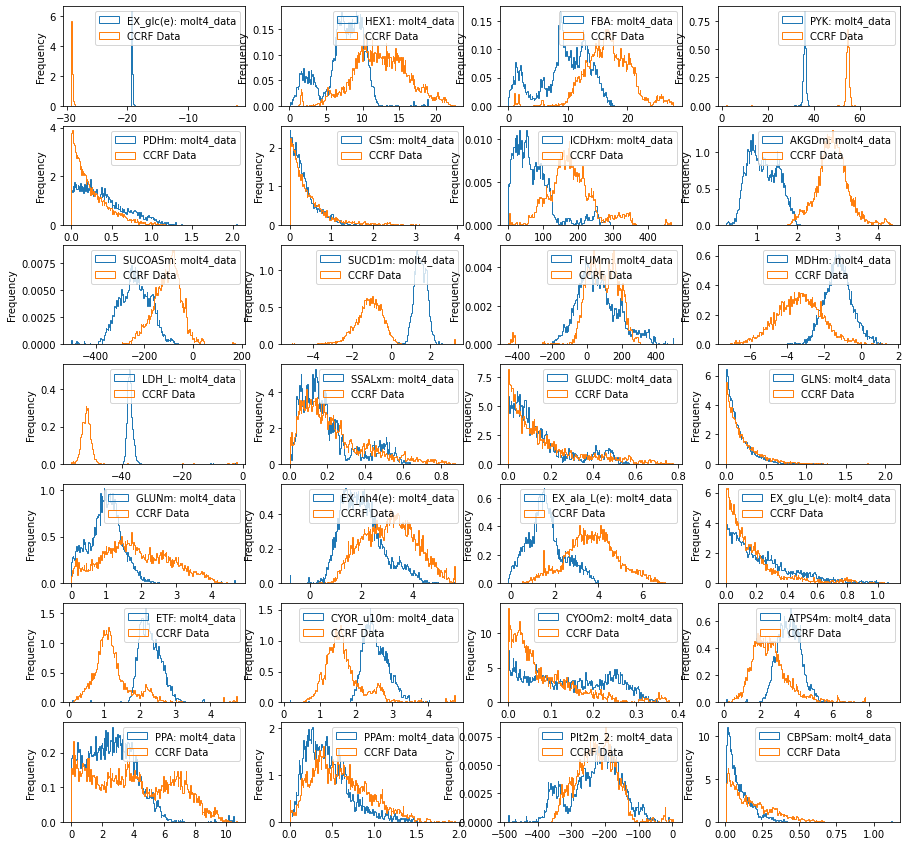

In [5]:
reactions = ['EX_glc(e)','HEX1','FBA','PYK','PDHm','CSm','ICDHxm','AKGDm','SUCOASm','SUCD1m',
            'FUMm','MDHm','LDH_L','SSALxm','GLUDC','GLNS','GLUNm','EX_nh4(e)','EX_ala_L(e)','EX_glu_L(e)',
            'ETF','CYOR_u10m','CYOOm2','ATPS4m','PPA','PPAm','PIt2m_2','CBPSam']
fig, axes = plt.subplots(nrows=7, ncols=4)
j=0
for i in range(len(reactions)):
    molt4_data=molt4[reactions[i]]
    CCRF_data=CCRF[reactions[i]]
    temp = pd.DataFrame({reactions[i]+ ': molt4_data':molt4_data, "CCRF Data":CCRF_data})
    temp.plot.hist(bins=250, histtype = 'step',ax=axes[j%7,i%4],figsize=(15,15),density=True)
    if (i != 0 and (i+1)%4 == 0):
        j += 1

## List the medians, standard deviations, and mean for the key reactions.

In [6]:
molt4_median = []
molt4_std = []
molt4_mean = []
CCRF_median = []
CCRF_std = []
CCRF_mean = []

for i in range(len(reactions)):
    molt4_median.append(molt4[reactions[i]].median())
    molt4_std.append(molt4[reactions[i]].std())
    molt4_mean.append(molt4[reactions[i]].mean())
    CCRF_median.append(CCRF[reactions[i]].median())
    CCRF_std.append(CCRF[reactions[i]].std())
    CCRF_mean.append(CCRF[reactions[i]].mean())
    
df_1 = pd.DataFrame(reactions) 
df_2 = pd.DataFrame(molt4_median).round(6)
df_3 = pd.DataFrame(molt4_std).round(6) 
df_4 = pd.DataFrame(molt4_mean).round(6)
df_5 = pd.DataFrame(CCRF_median).round(6)
df_6 = pd.DataFrame(CCRF_std).round(6) 
df_7 = pd.DataFrame(CCRF_mean).round(6)

df_8 = pd.concat([df_1,df_2,df_3, df_4, df_5, df_6, df_7], ignore_index=True, axis=1)
df_8.columns = ['Exchange Reactions', 'Molt-4 Median', 'Molt-4 Standard Deviation','Molt-4 Mean',
               'CCRF-CEM Median', 'CCRF-CEM Standard Deviation','CCRF-CEM Mean']

df_8

,Exchange Reactions,Molt-4 Median,Molt-4 Standard Deviation,Molt-4 Mean,CCRF-CEM Median,CCRF-CEM Standard Deviation,CCRF-CEM Mean
0,EX_glc(e),-19.263144,0.768222,-19.198503,-29.184208,2.303296,-28.888664
1,HEX1,7.701239,2.814336,7.263360,12.259029,3.750672,12.391105
2,FBA,9.734334,4.203163,9.293551,16.594017,3.877650,16.586112
3,PYK,35.919164,1.585702,35.824489,54.634772,4.469023,54.178711
4,PDHm,0.339627,0.297305,0.400053,0.184603,0.228322,0.251337
5,CSm,0.256303,0.296404,0.339904,0.295833,0.507241,0.459780
6,ICDHxm,57.780190,60.173781,72.878440,173.244813,65.637427,180.654198
7,AKGDm,1.125599,0.362733,1.154048,2.857747,0.392626,2.864314
8,SUCOASm,-239.764195,63.631482,-240.073373,-101.703760,57.448213,-107.494398
9,SUCD1m,1.471280,0.314119,1.481076,-1.117123,0.813593,-1.176572


## Load the pruned Molt-4 and CCRF-CEM models

In [7]:
# Molt-4 model
molt4_model = cobra.io.load_json_model("molt4_pruned_SM_genes.json")

# CCRF-CEM model
CCRF_model = cobra.io.load_json_model("CCRF_pruned_SM_genes.json")

## Show the performance summaries for the two models

In [8]:
molt4_model.summary(fva=0.95)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
anth[e],EX_anth(e),0.0001469,[0.0001469; 0.01923],7,0.04%
chol[e],EX_chol(e),0.007297,[7.084E-05; 0.02722],5,1.36%
cys_L[e],EX_cys_L(e),0.001976,[0.001878; 0.5479],3,0.22%
glc_D[e],EX_glc(e),0.1503,[0.0006472; 19.32],6,33.56%
gln_L[e],EX_gln_L(e),0.2003,[-6.915; 5.268],5,37.27%
his_L[e],EX_his_L(e),0.005364,[0.005096; 0.255],6,1.20%
ile_L[e],EX_ile_L(e),0.01221,[0.0116; 1.006],6,2.73%
leu_L[e],EX_leu_L(e),0.02322,[0.02206; 1.006],6,5.18%
lys_L[e],EX_lys_L(e),0.02513,[0.02387; 0.7217],6,5.61%
met_L[e],EX_met_L(e),0.006494,[0.006169; 0.006494],5,1.21%


In [9]:
CCRF_model.summary(fva=0.95)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
4hpro_LT[e],EX_4HPRO(e),0.0001615,[0.0001615; 0.403],5,0.03%
anth[e],EX_anth(e),0.0001469,[0.0001469; 0.01923],7,0.04%
chol[e],EX_chol(e),0.006501,[7.084E-05; 0.05637],5,1.35%
cys_L[e],EX_cys_L(e),0.001761,[0.001673; 0.5479],3,0.22%
glc_D[e],EX_glc(e),0.115,[0.0006472; 29.26],6,28.73%
gln_L[e],EX_gln_L(e),0.03984,[-12.69; 5.268],5,8.30%
his_L[e],EX_his_L(e),0.004779,[0.00454; 0.255],6,1.19%
ile_L[e],EX_ile_L(e),0.01111,[0.01057; 1.002],6,2.78%
leu_L[e],EX_leu_L(e),0.02443,[0.01987; 0.9983],6,6.10%
lys_L[e],EX_lys_L(e),0.02239,[0.02127; 0.5201],6,5.59%
